### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import selenium
import time
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException

import warnings
warnings.filterwarnings('ignore')

### Connect to the Web driver

In [6]:
driver = webdriver.Chrome('chromedriver.exe')

### Q 1. Write a python program which searches all the product under a particular product vertical from www.amazon.in. The product verticals to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

### 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product vertical has less than 3 pages in search results then scrape all the products available under that product vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

### Now we will send get request to the webpage server to get the source code of the page which is to be scraped by using the driver library.

In [3]:
page = driver.get('https://www.amazon.in')
page

### Click on search button

In [139]:
# click using xpath function
click = driver.find_element_by_xpath('//div[@class="card"]')
click.click()

### Click on search button

In [6]:
# click using xpath function
search_btn = driver.find_element_by_xpath('/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input')
search_btn.click()

# click using xpath function
search_1product = driver.find_element_by_xpath('/html/body/div[1]/div[2]/div[1]/div/div[1]/div/span[3]/div[2]/div[3]/div/span/div/div/div/div/div[2]/div[2]/div/div/div[1]/h2/a')
search_1product.click()

### Extract all Brand Name of 3 page

In [7]:
# Here we get all brand name from multiple page.

brand_name = []
for i in range(0,3):
    title_tags = driver.find_elements_by_xpath('//a[@class="a-link-normal a-text-normal"]')
    for i in title_tags[0:100]:
        try:
            brand_name.append(i.text)
        except:
            brand_name.append("-")
next_button = driver.find_element_by_xpath('//li[@class="a-last"]//a')
next_button.click()
time.sleep(10)
next_button = driver.find_element_by_xpath('//li[@class="a-last"]//a')
next_button.click()
time.sleep(10)

In [8]:
len(brand_name)

78

### Extract all No of ratigs of 3 page

In [13]:
# click using xpath function
click_1page = driver.find_element_by_xpath('//li[@class="a-normal"]//a')
click_1page.click()

In [14]:
# Here we get all No of rating from multiple page.

No_rating = []
for i in range(0,3):
    title_tags = driver.find_elements_by_xpath('//span[@class="a-size-base"]')
    for i in title_tags[0:100]:
        try:
            No_rating.append(i.text)
        except:
            No_rating.append("-")
next_button = driver.find_element_by_xpath('//li[@class="a-last"]//a')
next_button.click()
time.sleep(10)
next_button = driver.find_element_by_xpath('//li[@class="a-last"]//a')
next_button.click()
time.sleep(10)

In [15]:
len(No_rating)

66

### Extract all Price of 3 page

In [16]:
# click using xpath function
click_1page = driver.find_element_by_xpath('//li[@class="a-normal"]')
click_1page.click()

In [17]:
# Here we get all price from multiple page.

price = []
for i in range(0,3):
    title_tags = driver.find_elements_by_xpath('//span[@class="a-price-whole"]')
    for i in title_tags[0:100]:
        try:
            price.append(i.text)
        except:
            price.append("-")
next_button = driver.find_element_by_xpath('//li[@class="a-last"]//a')
next_button.click()
time.sleep(10)
next_button = driver.find_element_by_xpath('//li[@class="a-last"]//a')
next_button.click()
time.sleep(10)

In [18]:
len(price)

105

### Extract all Expected delivery of 3 page

In [19]:
# click using xpath function
click_1page = driver.find_element_by_xpath('//li[@class="a-normal"]//a')
click_1page.click()

In [20]:
# Here we get all Expexted Delivery from multiple page.

ex_delivery = []
for i in range(0,3):
    title_tags = driver.find_elements_by_xpath('//span[@class="a-text-bold"]')
    for i in title_tags[0:100]:
        try:
            ex_delivery.append(i.text)
        except:
            ex_delivery.append("-")
next_button = driver.find_element_by_xpath('//li[@class="a-last"]//a')
next_button.click()
time.sleep(10)
next_button = driver.find_element_by_xpath('//li[@class="a-last"]//a')
next_button.click()
time.sleep(10)

In [21]:
len(ex_delivery)

63

### Product Url

In [22]:
# click using xpath function
click_1page = driver.find_element_by_xpath('//li[@class="a-normal"]//a')
click_1page.click()

In [23]:
# Here we get all product links from multiple page.
brand_urls = []

for i in range(0,3):
    url = driver.find_elements_by_xpath('//a[@class="a-link-normal a-text-normal"]')
    for i in url[0:100]:
        try:
            brand_urls.append(i.get_attribute('href'))
        except:
            brand_urls.append("-")

next_button = driver.find_element_by_xpath('//li[@class="a-last"]//a')
next_button.click()
time.sleep(10)
next_button = driver.find_element_by_xpath('//li[@class="a-last"]//a')
next_button.click()
time.sleep(10) 


In [24]:
len(brand_urls)

96

In [25]:
print(len(brand_name), len(No_rating), len(price), len(ex_delivery), len(brand_urls))

78 66 105 63 96


### Create DataFrame

In [26]:
data = [{'Name': brand_name, 'Price': price, 'Rating': No_rating, 'Expected Delivery': ex_delivery, 'Url': brand_urls}]

In [27]:
df = pd.DataFrame(data)
df

Name  \
0  [pTron Dynamo Lite 10000mAh Li-Polymer Power B...   

                                               Price  \
0  [699, 1,499, 1,699, 599, 699, 1,699, 899, 1,09...   

                                              Rating  \
0  [2,445, 8,049, 2,445, 1,707, 2,282, 2,445, 2,4...   

                                   Expected Delivery  \
0  [Tuesday, July 20, Tomorrow, July 17, Monday, ...   

                                                 Url  
0  [https://www.amazon.in/gp/slredirect/picassoRe...

In [28]:
n1 = [brand_name]
n2 = [price]
n3 = [No_rating]
n4 = [ex_delivery]
n5 = [brand_urls]


In [29]:
a = np.matrix(n1).T
b = np.matrix(n2).T
c = np.matrix(n3).T
d = np.matrix(n4).T
e = np.matrix(n5).T

In [30]:
df = pd.DataFrame(list(zip(a,b,c,d,e)),
               columns =['Name', 'x', 'j','k', 'u'])
df.head()

Name                  x  \
0  [[[[['pTron Dynamo Lite 10000mAh Li-Polymer Po...    [[[[['699']]]]]   
1  [[[[['pTron Dynamo Pro 10000mAh 18W QC3.0 PD P...  [[[[['1,499']]]]]   
2  [[[[['Mi Power Bank 3i 20000mAh | 18W Fast PD ...  [[[[['1,699']]]]]   
3  [[[[['Mi 10000mAH Li-Polymer Power Bank 3i wit...    [[[[['599']]]]]   
4  [[[[['Mi Pocket Power Bank Pro Black 10000mAh ...    [[[[['699']]]]]   

                   j                              k  \
0  [[[[['2,445']]]]]   [[[[['Tuesday, July 20']]]]]   
1  [[[[['8,049']]]]]  [[[[['Tomorrow, July 17']]]]]   
2  [[[[['2,445']]]]]    [[[[['Monday, July 19']]]]]   
3  [[[[['1,707']]]]]  [[[[['Tomorrow, July 17']]]]]   
4  [[[[['2,282']]]]]    [[[[['Monday, July 19']]]]]   

                                                   u  
0  [[[[['https://www.amazon.in/gp/slredirect/pica...  
1  [[[[['https://www.amazon.in/gp/slredirect/pica...  
2  [[[[['https://www.amazon.in/20000mAh-Sandstone...  
3  [[[[['https://www.amazon.in/10000mAH-Li-Polyme...  
4  [[[[['https://www.amazon.in/Pocket-10000mAh-Tr...

In [31]:
df1 = pd.DataFrame(a)
df1.head(2)

0
0  pTron Dynamo Lite 10000mAh Li-Polymer Power Ba...
1  pTron Dynamo Pro 10000mAh 18W QC3.0 PD Power B...

In [32]:
df2 = pd.DataFrame(b)
df2.head(2)

0
0    699
1  1,499

In [33]:
df3 = pd.DataFrame(c)
df3.head(2)

0
0  2,445
1  8,049

In [34]:
df4 = pd.DataFrame(d)
df4.head(2)

0
0   Tuesday, July 20
1  Tomorrow, July 17

In [35]:
df5 = pd.DataFrame(e)
df5.head(2)

0
0  https://www.amazon.in/gp/slredirect/picassoRed...
1  https://www.amazon.in/gp/slredirect/picassoRed...

In [36]:
df6 =[df1,df2,df3,df4,df5]

In [37]:
result = pd.concat([df1,df2,df3,df4,df5],axis= 1, join = 'inner')
result

0      0       0  \
0   pTron Dynamo Lite 10000mAh Li-Polymer Power Ba...    699   2,445   
1   pTron Dynamo Pro 10000mAh 18W QC3.0 PD Power B...  1,499   8,049   
2   Mi Power Bank 3i 20000mAh | 18W Fast PD Chargi...  1,699   2,445   
3   Mi 10000mAH Li-Polymer Power Bank 3i with 18W ...    599   1,707   
4   Mi Pocket Power Bank Pro Black 10000mAh | Trip...    699   2,282   
..                                                ...    ...     ...   
58  Mi Power Bank 3i 20000mAh | 18W Fast PD Chargi...    599       1   
59  Redmi 10000 mAh Fast Charging Slim Power Bank ...    499  15,893   
60                                                       599   1,707   
61  URBN 10000 mAh Li-Polymer Ultra Compact Power ...    449   8,166   
62  OnePlus 10000 mAh Power Bank (Fast PD Charging...  1,099     963   

                    0                                                  0  
0    Tuesday, July 20  https://www.amazon.in/gp/slredirect/picassoRed...  
1   Tomorrow, July 17  https://www.amazon.in/gp/slredirect/picassoRed...  
2     Monday, July 19  https://www.amazon.in/20000mAh-Sandstone-Tripl...  
3   Tomorrow, July 17  https://www.amazon.in/10000mAH-Li-Polymer-Powe...  
4     Monday, July 19  https://www.amazon.in/Pocket-10000mAh-Triple-C...  
..                ...                                                ...  
58  Tomorrow, July 17  https://www.amazon.in/Ambrane-Charger-Qualcomm...  
59  Tomorrow, July 17  https://www.amazon.in/Ambrane-20000mAh-Li-Poly...  
60    Monday, July 19  https://www.amazon.in/Renewed-OnePlus-Buds-Gra...  
61  Tomorrow, July 17  https://www.amazon.in/Vandelay%C2%AE-Face-Acti...  
62  Saturday, July 24  https://www.amazon.in/Original-Superfast-Charg...  

[63 rows x 5 columns]

In [40]:
df7 = result.set_axis(['Brand Name', 'Price', 'Rating', 'Expected Delivery Date', 'URLS'], axis=1, inplace=False)
df7

Brand Name  Price  Rating  \
0   pTron Dynamo Lite 10000mAh Li-Polymer Power Ba...    699   2,445   
1   pTron Dynamo Pro 10000mAh 18W QC3.0 PD Power B...  1,499   8,049   
2   Mi Power Bank 3i 20000mAh | 18W Fast PD Chargi...  1,699   2,445   
3   Mi 10000mAH Li-Polymer Power Bank 3i with 18W ...    599   1,707   
4   Mi Pocket Power Bank Pro Black 10000mAh | Trip...    699   2,282   
..                                                ...    ...     ...   
58  Mi Power Bank 3i 20000mAh | 18W Fast PD Chargi...    599       1   
59  Redmi 10000 mAh Fast Charging Slim Power Bank ...    499  15,893   
60                                                       599   1,707   
61  URBN 10000 mAh Li-Polymer Ultra Compact Power ...    449   8,166   
62  OnePlus 10000 mAh Power Bank (Fast PD Charging...  1,099     963   

   Expected Delivery Date                                               URLS  
0        Tuesday, July 20  https://www.amazon.in/gp/slredirect/picassoRed...  
1       Tomorrow, July 17  https://www.amazon.in/gp/slredirect/picassoRed...  
2         Monday, July 19  https://www.amazon.in/20000mAh-Sandstone-Tripl...  
3       Tomorrow, July 17  https://www.amazon.in/10000mAH-Li-Polymer-Powe...  
4         Monday, July 19  https://www.amazon.in/Pocket-10000mAh-Triple-C...  
..                    ...                                                ...  
58      Tomorrow, July 17  https://www.amazon.in/Ambrane-Charger-Qualcomm...  
59      Tomorrow, July 17  https://www.amazon.in/Ambrane-20000mAh-Li-Poly...  
60        Monday, July 19  https://www.amazon.in/Renewed-OnePlus-Buds-Gra...  
61      Tomorrow, July 17  https://www.amazon.in/Vandelay%C2%AE-Face-Acti...  
62      Saturday, July 24  https://www.amazon.in/Original-Superfast-Charg...  

[63 rows x 5 columns]

### DataFrame Save into CSV File

In [44]:
df7.to_csv('Power Bank.csv')

### 3. Write a python program to access the search bar and search button on images.google.com and scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.

 - **Extract 100 of Fruits, Cars and Machine Learning**

### Now we will send get request to the webpage server to get the source code of the page which is to be scraped by using the driver library

In [3]:
page = driver.get('https://images.google.com/')
page

### Search by Xpath

In [4]:
search = driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]')
search

<selenium.webdriver.remote.webelement.WebElement (session="e7d4ba073e08c89115849a9a871a4aa3", element="4250bd61-0b80-4961-b573-1f5ad5e5b520")>

### Write on search bar

In [5]:
search.send_keys('fruits')

### Click on search button

In [6]:
# click using xpath function
search_btn = driver.find_element_by_xpath('//span[@class="z1asCe MZy1Rb"]')
search_btn.click()

### Fruits Image URLS

In [12]:
furl = []
for i in driver.find_elements_by_xpath('//img[@class="rg_i Q4LuWd"]'):
    furl.append(i.get_attribute("src"))

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcScNsyItlDyI1EElKhTmRzYCioXSNaDvYNztw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTYRn-Emn3lR4WiglVrDx69oghAW7W8Al-26g&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcROYH-uaHxJxZllD4i4p-a6Jx_gDHTAudnBxQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS62r1-dyhhAiaOPeU9qZzlAGrbmoTygqATCQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS-_Qp0xHt0hA8k_qVLW0cu9tbB3rtH1oC3qQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTo4_shfG85msF591Y45W4T800Efmd5L8ksvg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR6SjYxZXy_JKZ6NhUw1ZlY2uLry91NcHxN6A&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQc65bNSDE9i7baVuF9ftpQkabn68R7FKCJyw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQA6yOWfPWP2n
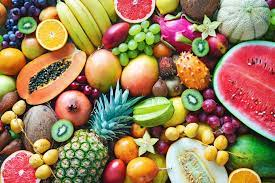
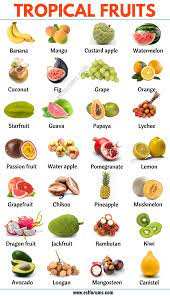
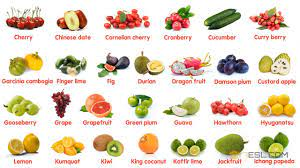
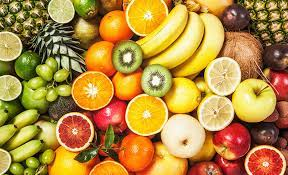
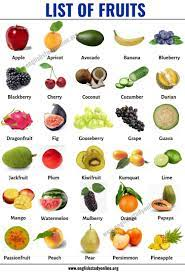
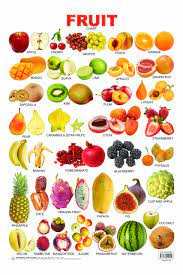
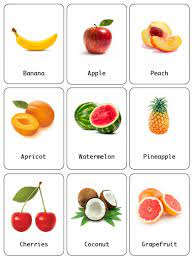
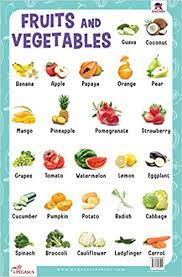
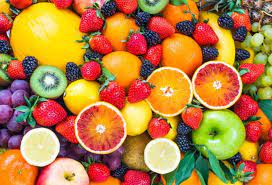
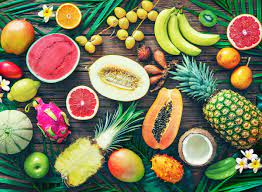
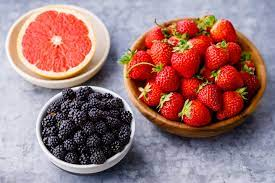
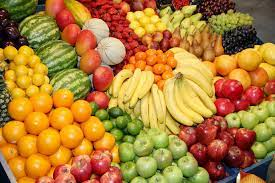
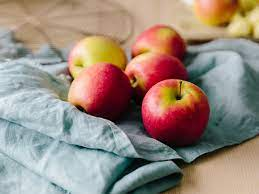
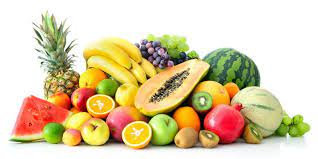
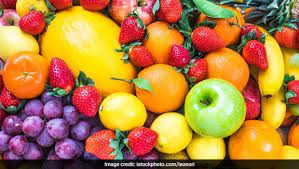
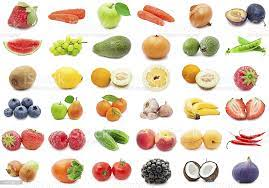
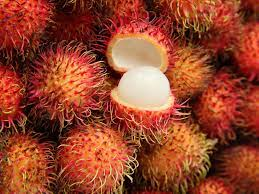
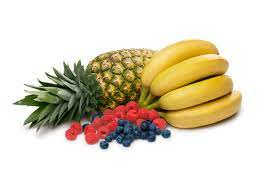
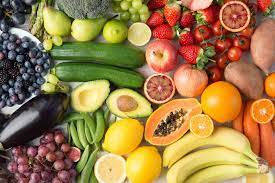
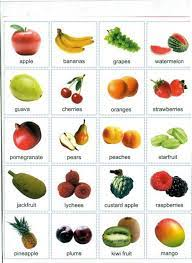

In [23]:
furl

In [14]:
len(furl)

48

In [15]:
fruits = []
for image in furl[:100]:
    driver.get(i)
    time.sleep(3)
    # fetching image
    try:
        image = driver.find_element_by_xpath('//a[@class="VFACy kGQAp sMi44c lNHeqe WGvvNb"]')
        fruits.append(i.fruits)
    except:
        fruits.append('-')
        

InvalidArgumentException: Message: invalid argument: 'url' must be a string
  (Session info: chrome=91.0.4472.124)


### 4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

 - **Extract Brand Name**
 - **Extract Smartphone name**
 - **Extract Colour**
 - **Extract Display Size**
 - **Extract Display Resolation**
 - **Extract Processor**
 - **Extract Procssor Cores**
 - **Extract Battery Capacity**
 - **Extract Price**
 - **Extract Url**

### Now we will send get request to the webpage server to get the source code of the page which is to be scraped by using the driver library

In [24]:
page = driver.get('https://www.flipkart.com/')
page

### Search by Xpath

In [25]:
search = driver.find_element_by_xpath('//input[@class="_3704LK"]')
search

<selenium.webdriver.remote.webelement.WebElement (session="e7d4ba073e08c89115849a9a871a4aa3", element="6cb504b1-2984-4592-b3a5-cf1a749fc470")>

### Write on search bar

In [26]:
search.send_keys('Oneplus Nord Phone')

### Click on search button

In [27]:
# click using xpath function
search_btn = driver.find_element_by_xpath('//button[@class="L0Z3Pu"]')
search_btn.click()

### Oneplus Nord

In [31]:
ourl = []
for i in driver.find_elements_by_xpath('//a[@class="_1fQZEK"]'):
    ourl.append(i.get_attribute("href"))

In [32]:
ourl

['https://www.flipkart.com/oneplus-one-silk-white-16-gb/p/itmevt8fkdg8hd6d?pid=MOBE87BTMHYBXHBJ&lid=LSTMOBE87BTMHYBXHBJYWARNX&marketplace=FLIPKART&q=Oneplus+Nord+Phone&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=SEARCH&iid=f5a91095-5066-461a-a688-030d6a4fb0fe.MOBE87BTMHYBXHBJ.SEARCH&ppt=hp&ppn=homepage&ssid=2cun1f1j800000001626494131090&qH=794a056fc8cfd41e']

In [59]:
brand = []
for i in ourl:
    driver.get(i)
    time.sleep(2)
    
    try:
        tags = driver.find_elements_by_xpath('//div[@divclass="_25b18c"]')
        brand.append(tags.text)
    except:
        brand.append("-")

In [60]:
len(brand)

1

In [61]:
df = pd.DataFrame(brand)
df

0
0  -

### 5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

 - **Extract Latitude and Longitude of city**

### Now we will send get request to the webpage server to get the source code of the page which is to be scraped by using the driver library.`

In [63]:
page = driver.get('https://www.google.co.in/maps/')
page

### Search by Xpath

In [75]:
search = driver.find_element_by_xpath('/html/body/jsl/div[3]/div[9]/div[3]/div[1]/div[1]/div[1]/div[2]/form/div/div[3]/div/input[1]')
search

<selenium.webdriver.remote.webelement.WebElement (session="e7d4ba073e08c89115849a9a871a4aa3", element="e919cad8-78a3-4ff2-bc5e-c4324a14d4fc")>

In [76]:
search.send_keys('Patna')

In [77]:
# click using xpath function
search_btn = driver.find_element_by_xpath('/html/body/jsl/div[3]/div[9]/div[3]/div[1]/div[1]/div[1]/div[2]/div[1]/button')
search_btn.click()

In [90]:
loc = []
try: 
    lat = driver.find_elements_by_xpath('//li[@class="nbpPqf-menu-x3Eknd"]')
    loc.append(lat.text)
except:
    loc.append("-")

In [89]:
loc

['-']

### 6. Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 – September 20) from trak.in.

### Now we will send get request to the webpage server to get the source code of the page which is to be scraped by using the driver library

In [98]:
page = driver.get('https://trak.in/')
page

### Click on more button

In [99]:
# click using xpath function
click_more = driver.find_element_by_xpath('//li[@class="menu-have-icon menu-icon-type-fontawesome menu-item menu-item-type-post_type menu-item-object-page better-anim-fade menu-item-51510"]')
click_more.click()

In [117]:
pd.set_option("display.max_columns", None)

In [119]:
july_2020 = []
row_1 = driver.find_elements_by_xpath('//td[@class="column-2"]')
for i in row_1:
    try:
        july_2020.append(i.text)
    except:
        july_2020.append("-")

In [129]:
july_2020[:10]

['01/04/2021',
 '05/04/2021',
 '14/04/2021',
 '07/04/2021',
 '14/04/2021',
 '04/03/2021',
 '31/03/2021',
 '30/03/2021',
 '30/03/2021',
 '23/03/2021']

In [122]:
df = pd.DataFrame(july_2020)
df.head(2)

0
0  01/04/2021
1  05/04/2021

In [123]:
company = []
row_1 = driver.find_elements_by_xpath('//td[@class="column-3"]')
for i in row_1:
    try:
        company.append(i.text)
    except:
        company.append("-")

In [128]:
company[:10]

['BYJU’S',
 'Meesho',
 'Swiggy',
 'Groww',
 'Beldara',
 'DealShare',
 'Uniphore',
 'Dunzo',
 'BYJU’S',
 'SkilloVilla']

In [131]:
industry = []
row_1 = driver.find_elements_by_xpath('//td[@class="column-4"]')
for i in row_1:
    try:
        industry.append(i.text)
    except:
        industry.append("-")

In [132]:
industry[:10]

['Edu-tech',
 'E-commerce',
 'Online Food Delivery',
 'FinTech',
 'E-commerce',
 'E-commerce',
 'Technology',
 'E-commerce',
 'Edu-tech',
 'Edu-tech']

In [134]:
Sub_industry = []
row_1 = driver.find_elements_by_xpath('//td[@class="column-5"]')
for i in row_1:
    try:
        Sub_industry.append(i.text)
    except:
        Sub_industry.append("-")

In [135]:
Sub_industry[:10]

['Online tutoring',
 'Online reselling platform',
 'Online Food Delivery',
 'Investment platform',
 'Global B2B marketplace',
 'Online shopping platform',
 'Conversational Service Automation (CSA)',
 'Hyper-local delivery app',
 'Online tutoring',
 'Career and job-oriented upskilling.']

In [136]:
location = []
row_1 = driver.find_elements_by_xpath('//td[@class="column-6"]')
for i in row_1:
    try:
        location.append(i.text)
    except:
        location.append("-")

In [137]:
location[:10]

['Bengaluru',
 'Bengaluru',
 'Bengaluru',
 'Bengaluru',
 'Mumbai',
 'Jaipur, Rajasthan',
 'Palo Alto',
 'Bengaluru',
 'Bengaluru',
 'Bengaluru']

In [138]:
investors = []
row_1 = driver.find_elements_by_xpath('//td[@class="column-7"]')
for i in row_1:
    try:
        investors.append(i.text)
    except:
        investors.append("-")

In [139]:
investors[:10]

['Innoven Capital',
 'SoftBank Vision Fund 2',
 'Amansa Holdings, Carmignac, Falcon Edge Capital, Goldman Sachs, Think Investments',
 'MC Global Edtech, B Capital, Baron, others',
 'Hindustan Media Ventures',
 'Innoven Capital',
 'Sorenson Capital Partners',
 'Krishtal Advisors Pte Ltd',
 'MC Global Edtech, B Capital, Baron, others',
 'Titan Capital, others']

In [140]:
investment = []
row_1 = driver.find_elements_by_xpath('//td[@class="column-8"]')
for i in row_1:
    try:
        investment.append(i.text)
    except:
        investment.append("-")

In [141]:
investment[:10]

['Series F',
 'Series E',
 'Series J',
 'Series D',
 'Venture',
 'Debt Financing',
 'Series D',
 'Series E',
 'Series F',
 'Seed']

In [142]:
amount = []
row_1 = driver.find_elements_by_xpath('//td[@class="column-9"]')
for i in row_1:
    try:
        amount.append(i.text)
    except:
        amount.append("-")

In [143]:
amount[:10]

['460,000,000',
 '300,000,000',
 '343,000,000',
 '83,000,000',
 '7,400,000',
 '250,000,000',
 '140,000,000',
 '8,000,000',
 '460,000,000',
 '300,000,000']

### Create DataFrame

In [145]:
ISF = pd.DataFrame({})
ISF['Date'] = july_2020
ISF['Startup Name'] = company
ISF['Idustry Vertical'] = industry
ISF['Sub Vertical'] = Sub_industry
ISF['City Location'] = location
ISF["Investor's Name"] = investors
ISF['Investment Type'] = investment
ISF['Amount(USD)'] = amount
ISF

Date    Startup Name      Idustry Vertical  \
0    01/04/2021          BYJU’S              Edu-tech   
1    05/04/2021          Meesho            E-commerce   
2    14/04/2021          Swiggy  Online Food Delivery   
3    07/04/2021           Groww               FinTech   
4    14/04/2021         Beldara            E-commerce   
..          ...             ...                   ...   
387  09/07/2018        zippserv     Consumer Internet   
388  09/07/2018           Groww     Consumer Internet   
389  10/07/2018   Avenue Growth     Consumer Internet   
390  10/07/2018           iNICU            Healthcare   
391  10/07/2018  Kinara Capital               Finance   

                                          Sub Vertical City Location  \
0                                      Online tutoring     Bengaluru   
1                            Online reselling platform     Bengaluru   
2                                 Online Food Delivery     Bengaluru   
3                                  Investment platform     Bengaluru   
4                               Global B2B marketplace        Mumbai   
..                                                 ...           ...   
387  Online Platform For Risk-Assessment Services F...     Bengaluru   
388  Online Platform That Sells Direct Plans Of Mut...     Bengaluru   
389  Online Platform That Connects Brands With Free...      Gurugram   
390      Med-tech Platform Providing Care For Newborns         Delhi   
391   Lending Platform For Micro and Small Enterprises     Bengaluru   

                                       Investor's Name      Investment Type  \
0                                      Innoven Capital             Series F   
1                               SoftBank Vision Fund 2             Series E   
2    Amansa Holdings, Carmignac, Falcon Edge Capita...             Series J   
3           MC Global Edtech, B Capital, Baron, others             Series D   
4                             Hindustan Media Ventures              Venture   
..                                                 ...                  ...   
387                              Info Edge (India) Ltd  Seed/ Angel Funding   
388  Insignia Ventures Partners, Lightbridge Partne...  Seed/ Angel Funding   
389  Avtar Monga, chief operating office at IDFC Ba...  Seed/ Angel Funding   
390                                  Venture Catalysts  Seed/ Angel Funding   
391                                     ResponsAbility       Private Equity   

     Amount(USD)  
0    460,000,000  
1    300,000,000  
2    343,000,000  
3     83,000,000  
4      7,400,000  
..           ...  
387      440,000  
388    1,100,000  
389      437,000  
390          N/A  
391    5,000,000  

[392 rows x 8 columns]

### Saving DataFrame

In [146]:
ISF.to_csv('Indian Startup Funding & Investment.csv')

### 7. Write a program to scrap all the available details of best gaming laptops from digit.in.

### Now we will send get request to the webpage server to get the source code of the page which is to be scraped by using the driver library.

In [7]:
page = driver.get('https://www.digit.in/')
page

### Search by Xpath

In [8]:
# click using xpath function
search_btn = driver.find_element_by_xpath('/html/body/div[1]/div[2]/div[3]/div[2]')
search_btn.click()

In [9]:
search = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/div/input')
search

<selenium.webdriver.remote.webelement.WebElement (session="369d8923db609fbf173b245fa07ea2d5", element="fc9c2ed9-7a0b-4e52-bebb-f6025bad9984")>

In [10]:
search.send_keys('best gaming laptop ')

In [12]:
search_btn = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/div')
search_btn.click()

### URL

In [18]:
url = []
for i in driver.find_elements_by_xpath('//p[@class="products"]//a'):
    url.append(i.get_attribute("href"))

In [19]:
url

[]

In [16]:
brand = []
for i in url:
    driver.get(i)
    time.sleep(2)
    
    try:
        tags = driver.find_element_by_xpath('/html/body/div[7]/div/div/div[1]/h1')
        brand.append(tags.text)
    except:
        brand.append("-")

In [17]:
brand

[]

In [172]:
date = []
for i in url:
    driver.get(i)
    time.sleep(2)
    
    try:
        tags = driver.find_element_by_xpath('/html/body/div[7]/div/div/div[4]/div[1]/b')
        date.append(tags.text)
    except:
        date.append("-")

In [173]:
date

['14 Oct, 2014']

In [174]:
site = []
for i in url:
    driver.get(i)
    time.sleep(2)
    
    try:
        tags = driver.find_element_by_xpath('/html/body/div[7]/div/div/div[6]/div[1]/div[2]/div[1]/div[3]/b')
        site.append(tags.text)
    except:
        site.append("-")

In [175]:
site

['Asus']

In [180]:
price = []
for i in url:
    driver.get(i)
    time.sleep(2)
    
    try:
        tags = driver.find_element_by_xpath('/html/body/div[7]/div/div/div[6]/div[1]/div[2]/div[4]/div[1]/b')
        price.append(tags.text)
    except:
        price.append("-")

In [181]:
price

['149,999']

In [214]:
url2 = []
for i in driver.find_elements_by_xpath('/html/body/div[6]/div[2]/div[2]/div[4]/a'):
    url.append(i.get_attribute("href"))

In [215]:
url2

[]

### 8. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

### Now we will send get request to the webpage server to get the source code of the page which is to be scraped by using the driver library.

In [3]:
page = driver.get('https://www.forbes.com/')
page

### Click

In [4]:
# click using xpath function
search_btn = driver.find_element_by_xpath('//button[@class="icon--hamburger"]')
search_btn.click()

In [7]:
# click using xpath function
search_billionaires = driver.find_element_by_xpath('//li[@class="header__channel header__color--centennial-silver header__hoverable"]')
search_billionaires.click()

### Rank

In [21]:
rank = []
url = driver.find_elements_by_xpath('//div[@class="rank"]')
for i in url[:200]:
    try:
        rank.append(i.text)
    except:
        rank.append("-")

In [22]:
rank[:10]

['1.', '2.', '3.', '4.', '5.', '6.', '7.', '8.', '9.', '10.']

In [23]:
len(rank)

200

### Name

In [24]:
name = []
url_name = driver.find_elements_by_xpath('//div[@class="personName"]')
for i in url_name[:200]:
    try:
        name.append(i.text)
    except:
        name.append("-")

In [25]:
name[:10]

['Jeff Bezos',
 'Elon Musk',
 'Bernard Arnault & family',
 'Bill Gates',
 'Mark Zuckerberg',
 'Warren Buffett',
 'Larry Ellison',
 'Larry Page',
 'Sergey Brin',
 'Mukesh Ambani']

In [26]:
len(name)

200

### Net Worth

In [27]:
worth = []
url_worth = driver.find_elements_by_xpath('//div[@class="netWorth"]')
for i in url_worth[:200]:
    try:
        worth.append(i.text)
    except:
        worth.append("-")

In [28]:
worth[:10]

['$177 B',
 '$151 B',
 '$150 B',
 '$124 B',
 '$97 B',
 '$96 B',
 '$93 B',
 '$91.5 B',
 '$89 B',
 '$84.5 B']

In [29]:
len(worth)

200

### Country

In [30]:
country = []
url_country = driver.find_elements_by_xpath('//div[@class="countryOfCitizenship"]')
for i in url_country[:200]:
    try:
        country.append(i.text)
    except:
        country.append("-")

In [31]:
country[:10]

['United States',
 'United States',
 'France',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'India']

In [32]:
len(country)

200

### Age

In [33]:
age = []
url_age = driver.find_elements_by_xpath('//div[@class="age"]')
for i in url_age[:200]:
    try:
        age.append(i.text)
    except:
        age.append("-")

In [34]:
age[:10]

['57', '49', '72', '65', '36', '90', '76', '48', '47', '63']

In [35]:
len(age)

200

### Source

In [36]:
source = []
url_source = driver.find_elements_by_xpath('//div[@class="source"]')
for i in url_source[:200]:
    try:
        source.append(i.text)
    except:
        source.append("-")

In [37]:
source[:10]

['Amazon',
 'Tesla, SpaceX',
 'LVMH',
 'Microsoft',
 'Facebook',
 'Berkshire Hathaway',
 'software',
 'Google',
 'Google',
 'diversified']

In [38]:
len(source)

200

### Industry

In [39]:
industry = []
url_industry = driver.find_elements_by_xpath('//div[@class="category"]')
for i in url_industry[:200]:
    try:
        industry.append(i.text)
    except:
        industry.append("-")

In [40]:
industry[:10]

['Technology',
 'Automotive',
 'Fashion & Retail',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Technology',
 'Technology',
 'Technology',
 'Diversified']

In [41]:
len(industry)

200

### Create DataFrame

In [42]:
billionaires = pd.DataFrame({})
billionaires['Rank'] = rank
billionaires['Name'] = name
billionaires['Age'] = age
billionaires['Country'] = country
billionaires['New Worth'] = worth
billionaires['Source'] = source
billionaires['Industry'] = industry
billionaires

Rank                      Name Age        Country New Worth  \
0      1.                Jeff Bezos  57  United States    $177 B   
1      2.                 Elon Musk  49  United States    $151 B   
2      3.  Bernard Arnault & family  72         France    $150 B   
3      4.                Bill Gates  65  United States    $124 B   
4      5.           Mark Zuckerberg  36  United States     $97 B   
..    ...                       ...  ..            ...       ...   
195  195.           Harry Triguboff  88      Australia   $11.2 B   
196  197.     Leonid Fedun & family  65         Russia   $11.1 B   
197  197.                 Eyal Ofer  70         Israel   $11.1 B   
198  197.              Evan Spiegel  30  United States   $11.1 B   
199  200.     Luis Carlos Sarmiento  88       Colombia     $11 B   

                    Source               Industry  
0                   Amazon             Technology  
1            Tesla, SpaceX             Automotive  
2                     LVMH       Fashion & Retail  
3                Microsoft             Technology  
4                 Facebook             Technology  
..                     ...                    ...  
195            real estate            Real Estate  
196                    oil                 Energy  
197  real estate, shipping            Diversified  
198               Snapchat             Technology  
199                banking  Finance & Investments  

[200 rows x 7 columns]

### Saving into CSV

In [43]:
billionaires.to_csv('Billionaires.csv')

### 9. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.

### Now we will send get request to the webpage server to get the source code of the page which is to be scraped by using the driver library.

In [44]:
page = driver.get('https://www.youtube.com/')
page

### Click

In [49]:
# click using xpath function
click = driver.find_element_by_xpath('/html/body/ytd-app/div/ytd-page-manager/ytd-browse/ytd-two-column-browse-results-renderer/div[1]/ytd-rich-grid-renderer/div[6]/ytd-rich-section-renderer[1]/div/ytd-rich-shelf-renderer/div[1]/div[2]/ytd-rich-item-renderer[2]/div/ytd-rich-grid-media/div[1]/div/div[1]/h3/a')
click.click()

### Comment

In [121]:
comment = []
url = driver.find_elements_by_xpath('//yt-formatted-string[@class="style-scope ytd-comment-renderer"]')
for i in url[:100]:
    try:
        comment.append(i.text)
    except:
        comment.append("-")

In [122]:
comment[:10]

['',
 'Thank u sir for good suggestion 🙏',
 '',
 'Wow you are an real friend of all patients and second god',
 '',
 'Thanks doctor for your best advice on vaccine',
 '',
 'But how to find out who has allergic reaction from covishield ! This is the question .after vaccination damage has been done sir..🤣🤣',
 '',
 'After taken covaxin, people can travel any where??? and people will safe from corona in traveling after completing 2 dose?']

In [123]:
len(comment)

100

### Time

In [124]:
time = []
url_time = driver.find_elements_by_xpath('//yt-formatted-string[@class="published-time-text above-comment style-scope ytd-comment-renderer"]//a')
for i in url_time[:100]:
    try:
        time.append(i.text)
    except:
        time.append("-")

In [125]:
time[:10]

['1 day ago',
 '1 hour ago',
 '2 hours ago',
 '10 hours ago',
 '6 days ago',
 '4 days ago',
 '3 days ago',
 '1 day ago',
 '4 days ago',
 '5 days ago']

In [126]:
len(time)

100

### Up Vote

In [127]:
vote = []
url_vote = driver.find_elements_by_xpath('//span[@class="style-scope ytd-comment-action-buttons-renderer"]')
for i in url_vote[:100]:
    try:
        vote.append(i.text)
    except:
        vote.append("-")

In [128]:
vote[:10]

['', '5', '', '', '', '', '', '', '', '10']

In [129]:
len(vote)

100

### Create DataFrame

In [130]:
youtube = pd.DataFrame({})
youtube['Comment'] = comment
youtube['Time'] = time
youtube['Up Vote'] = vote
youtube

Comment          Time Up Vote
0                                                         1 day ago        
1                   Thank u sir for good suggestion 🙏    1 hour ago       5
2                                                       2 hours ago        
3   Wow you are an real friend of all patients and...  10 hours ago        
4                                                        6 days ago        
..                                                ...           ...     ...
95  Dr, kindly advise if someone has mild synus ta...    1 week ago       7
96                                                       6 days ago        
97   Ok sir thank you for your word to take are of us    1 week ago       3
98                                                       1 week ago        
99                                     Padmini thakur    1 week ago        

[100 rows x 3 columns]

### Saving into CSV


In [132]:
youtube.to_csv('YouTube Comment.csv')

### 10. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

### Now we will send get request to the webpage server to get the source code of the page which is to be scraped by using the driver library.


In [21]:
page = driver.get('https://www.hostelworld.com/')
page

### Click on London

In [22]:
# click using xpath function
click = driver.find_element_by_xpath('/html/body/div[1]/div/div/div[1]/div[4]/section/div/div[1]/a')
click.click()

### Hostel Name

In [23]:
hostel = driver.find_elements_by_xpath('//a[@class="hwta-property-link"]')
hostel[:5]

[<selenium.webdriver.remote.webelement.WebElement (session="369d8923db609fbf173b245fa07ea2d5", element="dbc56e1d-9f75-4509-b997-e0b0dbb13ee3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="369d8923db609fbf173b245fa07ea2d5", element="5f6a5beb-a138-453a-bd74-d6fed4ca098a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="369d8923db609fbf173b245fa07ea2d5", element="94bc4a84-71ef-4f07-871b-555c24b3dda5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="369d8923db609fbf173b245fa07ea2d5", element="2cea5180-8fb5-4948-8426-7cf8c42e4c84")>,
 <selenium.webdriver.remote.webelement.WebElement (session="369d8923db609fbf173b245fa07ea2d5", element="4fbd93ac-73e3-4ee6-8b01-47a5174de907")>]

In [24]:
name = []
for i in hostel[:30]:
    try:
        name.append(i.text)
    except:
        name.append('-')
        

In [25]:
name[:5]

['London Backpackers', 'Selina Camden', '', 'SoHostel', '']

In [26]:
len(name)

30

### Distance

In [27]:
distance = []
url_dis = driver.find_elements_by_xpath('//div[@class="addressline"]')
for i in url_dis[:30]:
    try:
        distance.append(i.text)
    except:
        distance.append("-")

In [28]:
distance[:5]

['11.9km from city centre',
 '5.5km from city centre',
 '',
 '2km from city centre - SHOW ON MAP',
 '10km from city centre - SHOW ON MAP']

In [29]:
len(distance)

30

### Rating

In [30]:
rating = []
url_rat = driver.find_elements_by_xpath('//a[@class="hwta-rating-score"]')
for i in url_rat[:30]:
    try:
        rating.append(i.text)
    except:
        rating.append("-")

In [31]:
rating[:5]

['9.0', '8.9', '7.7', '7.7', '7.3']

In [32]:
len(rating)

30

### Review

In [33]:
review = []
url_review = driver.find_elements_by_xpath('//p[@class="show-for-medium-up"]')
for i in url_review[:30]:
    try:
        review.append(i.text.replace('\n', ''))
    except:
        review.append("-")

In [34]:
review[:5]

["SoHostel offers modern rooms, located in the heart of London's entertainment centre, Soho.... More...",
 'UNFORTUNATELY WE DO NOT HAVE THE FACILITIES TO APPROPRIATELY ACCOMMODATE GUESTS WHO NEED TO SELF ISOLATE FOR 14 DAYS.ALL GUESTS ARE REQUIRED TO WEAR A FACE COVERING AS PER UK GOVERNMENT GUIDELIN... More...',
 'No.8 is a Unique Brand of Hostels developed and delicately integrated within Traditional Old English Pubs. For Facilities, Customer Service & Affordability it must be No.8!... More...',
 'We offer comfortable, stylish rooms in central London, with good security, Free WI-FI. laundry facilities and more.... More...',
 "Our hostel's centrally located with good access to all London attractions, a wonderful place to make friends.... More..."]

In [35]:
len(review)

30

### Price

In [36]:
price = []
url_price = driver.find_elements_by_xpath('//span[@class="price"]//a')
for i in url_price[:30]:
    try:
        price.append(i.text)
    except:
        price.append("-")

In [37]:
price[:5]

['From: INR1121.00', 'From: INR2673.08', '', 'INR1528.64', 'INR514.64']

In [38]:
len(price)

30

### Create DataFrame

In [39]:
hotel = pd.DataFrame({})
hotel['Name'] = name
hotel['Distance'] = distance
hotel['Price'] = price
hotel['Rating'] = rating
hotel['Review'] = review
hotel.head()

Name                             Distance             Price  \
0  London Backpackers              11.9km from city centre  From: INR1121.00   
1       Selina Camden               5.5km from city centre  From: INR2673.08   
2                                                                              
3            SoHostel   2km from city centre - SHOW ON MAP        INR1528.64   
4                      10km from city centre - SHOW ON MAP         INR514.64   

  Rating                                             Review  
0    9.0  SoHostel offers modern rooms, located in the h...  
1    8.9  UNFORTUNATELY WE DO NOT HAVE THE FACILITIES TO...  
2    7.7  No.8 is a Unique Brand of Hostels developed an...  
3    7.7  We offer comfortable, stylish rooms in central...  
4    7.3  Our hostel's centrally located with good acces...

### Saving into CSV

In [40]:
hotel.to_csv('Hotel.csv')